# ウィルス弱毒化の SIR 的モデル

(Version 0.0.1)

患者の行動(隔離など)により、「ウィルスの弱毒化」が起きうることを示したい (参: \[cocolog:94891057\](2024年6月) or >>2024-08-09T09:02:59Z )

強毒のものが隔離される(死亡する)ことで、感染性をもつが、毒性の弱いものが広がりやすくなるはずだ。…という信念である。

これを Grok3 さんに相談したところ、早速、数理モデルを示してくれた(!)ので、それを Python で図示するコードも教えてもらった。以下がその会話である。

https://x.com/i/grok/share/2wKN9S2lbHzonHDHEkEITRvxg

そのコードを Gist として残しておく。

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

モデルの微分方程式

In [ ]:
def virus_dynamics(y, t, beta_s, beta_w, gamma_s, gamma_w, mu_s, mu_w, q_s, q_w):
    S, Is, Iw, R, D = y

    dS_dt = -beta_s * S * Is - beta_w * S * Iw
    dIs_dt = beta_s * S * Is - (gamma_s + mu_s + q_s) * Is
    dIw_dt = beta_w * S * Iw - (gamma_w + mu_w + q_w) * Iw
    dR_dt = gamma_s * Is + gamma_w * Iw
    dD_dt = mu_s * Is + mu_w * Iw

    return [dS_dt, dIs_dt, dIw_dt, dR_dt, dD_dt]

パラメータ設定

In [ ]:
#beta_s = 0.3   # 強毒株の感染率
#beta_w = 0.4   # 弱毒株の感染率（より高い）
beta_s = 0.0003  # 強毒株の感染率
beta_w = 0.0004   # 弱毒株の感染率（より高い）
gamma_s = 0.1  # 強毒株の回復率
gamma_w = 0.1  # 弱毒株の回復率
mu_s = 0.1     # 強毒株の死亡率（高い）
mu_w = 0.01    # 弱毒株の死亡率（低い）
q_s = 0.2      # 強毒株の隔離率（高い）
q_w = 0.05     # 弱毒株の隔離率（低い）

初期条件

In [ ]:
S0 = 1000.0    # 初期感受性者
#Is0 = 1.0      # 初期強毒株感染者
Is0 = 100.0      # 初期強毒株感染者
Iw0 = 1.0      # 初期弱毒株感染者
R0 = 0.0       # 初期回復者
D0 = 0.0       # 初期死亡者
y0 = [S0, Is0, Iw0, R0, D0]

常微分方程式を解く。

In [ ]:
# 時間ベクトル（0〜100日）
t = np.linspace(0, 100, 1000)

# ODEを解く
params = (beta_s, beta_w, gamma_s, gamma_w, mu_s, mu_w, q_s, q_w)
solution = odeint(virus_dynamics, y0, t, args=params)

# 結果を展開
S, Is, Iw, R, D = solution.T

結果表示。立ち上がりが急すぎるのを抑えるため beta_s, beta_w を当初よりかなり小さくした。立ち上がりが急でないことの確認をする。

In [ ]:
print(Is[0:2], Iw[0:2])

[100.         98.9994877] [1.         1.02425278]


グラフ描画

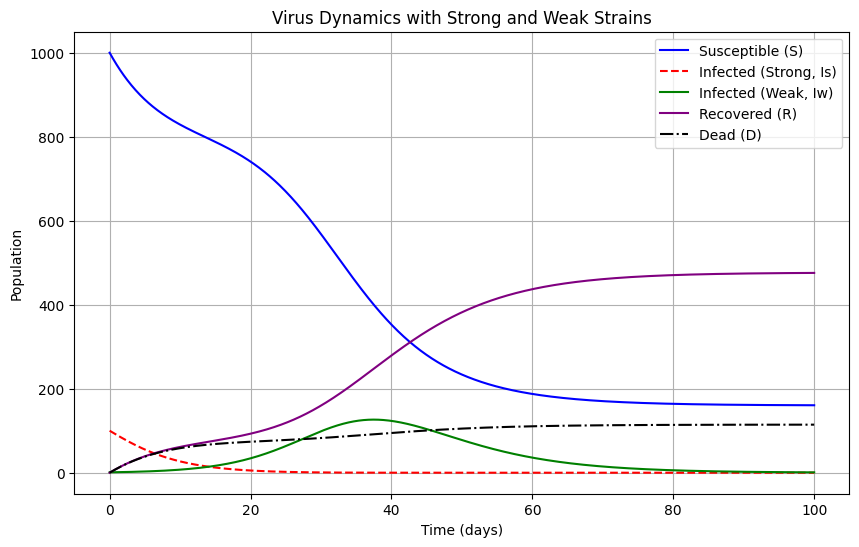

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible (S)', color='blue')
plt.plot(t, Is, label='Infected (Strong, Is)', color='red', linestyle='--')
plt.plot(t, Iw, label='Infected (Weak, Iw)', color='green')
plt.plot(t, R, label='Recovered (R)', color='purple')
plt.plot(t, D, label='Dead (D)', color='black', linestyle='-.')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Virus Dynamics with Strong and Weak Strains')
plt.legend()
plt.grid(True)
plt.show()


基本再生産数の計算

In [ ]:
R0s = beta_s / (gamma_s + mu_s + q_s)
R0w = beta_w / (gamma_w + mu_w + q_w)
print(f"Basic Reproduction Number (Strong): R0s = {R0s:.8f}")
print(f"Basic Reproduction Number (Weak): R0w = {R0w:.8f}")

Basic Reproduction Number (Strong): R0s = 0.00075000
Basic Reproduction Number (Weak): R0w = 0.00250000
